In [1]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import zipfile
import urllib.request
import io
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
warnings.filterwarnings('ignore')

In [22]:
# combined data
# load processed data
train_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_median and train_latest
train = pd.concat([train_median, train_latest, train_dispers, train_min, train_max], axis=1)
X_train = train.drop(columns=['id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'dicom_id', 'study_id', 'ViewPosition', 'StudyDate', 'StudyTime', 'image_path', 'readmitted_within_30days'])
y_train = train['readmitted_within_30days']

# load processed data
test_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_median and train_latest
test = pd.concat([test_median, test_latest, test_dispers, test_min, test_max], axis=1)
X_test = test.drop(columns=['id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'dicom_id', 'study_id', 'ViewPosition', 'StudyDate', 'StudyTime', 'image_path'])
X_test

,HORMONES_mean_mode,ANTICOAGULANTS_mean_mode,ANTIARTHRITICS_mean_mode,ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS_mean_mode,BLOOD_mean_mode,DIURETICS_mean_mode,ANTIPARKINSON DRUGS_mean_mode,ANTIHISTAMINES_mean_mode,ANTIBIOTICS_mean_mode,CARDIOVASCULAR_mean_mode,...,EENT PREPS_max,age_max,ANALGESICS_max,COUGH/COLD PREPARATIONS_max,ANTIVIRALS_max,ANTIASTHMATICS_max,ANTIPARASITICS_max,SKIN PREPS_max,PRE-NATAL VITAMINS_max,ANTIFUNGALS_max
0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,...,0.0,57.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,15.0,0.0,...,1.0,81.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,0.0,0.0,2.0,14.0,0.0,0.0,7.0,0.0,...,5.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,...,3.0,75.0,8.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,75.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,0.0,3.0,0.0,0.0,7.0,16.0,0.0,0.0,9.0,1.0,...,1.0,63.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2932,1.0,3.0,0.0,0.0,3.0,4.0,0.0,2.0,11.0,0.0,...,0.0,64.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2933,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,3.0,...,0.0,64.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,77.0,7.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


In [3]:
def esemble_tree_cv(weight, X_train = X_train, y_train = y_train):
    auc_scores = []
    for cv in range(5):
        X_test_cv = X_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5), :]
        y_test_cv = y_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)]
        X_train_cv = X_train.drop(X_train.index[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)])
        y_train_cv = y_train.drop(y_train.index[cv*int(len(y_train)/5):(cv+1)*int(len(y_train)/5)])

        Ext_best = ExtraTreesClassifier(
            max_depth=1135,
            min_samples_leaf=2,
            min_samples_split=2,
            n_estimators=1614
        )
        Ext_res = Ext_best.fit(X_train_cv, y_train_cv)
        Gb_best = GradientBoostingClassifier(
            learning_rate=0.05104619739803147,
            max_depth=10,
            min_samples_leaf=18,
            min_samples_split=17,
            n_estimators=103
        )
        Gb_res = Gb_best.fit(X_train_cv, y_train_cv)
        Xgb_best = XGBClassifier(
            learning_rate=0.07856721676232462,
            max_depth=7,
            n_estimators=78,
            scale_pos_weight=0.1
        )
        Xgb_res = Xgb_best.fit(X_train_cv, y_train_cv)

        y_pred_Ext = Ext_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Gb = Gb_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Xgb = Xgb_res.predict_proba(X_test_cv)[:, 1]

        y_pred = weight[0]*y_pred_Ext + weight[1]*y_pred_Gb + weight[2]*y_pred_Xgb
        auc_scores.append(roc_auc_score(y_test_cv, y_pred))

        print(f'cv {cv} auc: {roc_auc_score(y_test_cv, y_pred)}')
    print(f'finished cv for {weight}')

    return np.mean(auc_scores)


In [5]:
weights = []
for weight_1 in np.linspace(0, 1, 5):
    for weight_2 in np.linspace(0, 1, 5):
        if weight_1 + weight_2 <= 1:
            weight_3 = 1 - weight_1 - weight_2
            weights.append([weight_1, weight_2, weight_3])

auc_scores = []
for weight in weights:
    auc_scores.append({'weight': weight, 'auc': esemble_tree_cv(weight)})

cv 0 auc: 0.7977095093356491
cv 1 auc: 0.8127674794341461
cv 2 auc: 0.7998303647158609
cv 3 auc: 0.7908882602183849
cv 4 auc: 0.8187931233118704
finished cv for [0.0, 0.0, 1.0]
cv 0 auc: 0.800054012263961
cv 1 auc: 0.8092500092500092
cv 2 auc: 0.7985884864674907
cv 3 auc: 0.7904939899384273
cv 4 auc: 0.8239660005888452
finished cv for [0.0, 0.25, 0.75]
cv 0 auc: 0.7964651091365451
cv 1 auc: 0.7995683329016663
cv 2 auc: 0.7975183573385757
cv 3 auc: 0.79178432903647
cv 4 auc: 0.8243103470346523
finished cv for [0.0, 0.5, 0.5]
cv 0 auc: 0.7983171473052116
cv 1 auc: 0.7961223961223961
cv 2 auc: 0.7916181145117437
cv 3 auc: 0.7895454370895685
cv 4 auc: 0.8183975729336014
finished cv for [0.0, 0.75, 0.25]
cv 0 auc: 0.8015618546328755
cv 1 auc: 0.8003872670539338
cv 2 auc: 0.7858209211565851
cv 3 auc: 0.7871350119689192
cv 4 auc: 0.827243052266414
finished cv for [0.0, 1.0, 0.0]
cv 0 auc: 0.798412463065143
cv 1 auc: 0.8155868822535489
cv 2 auc: 0.7984101316126714
cv 3 auc: 0.7958870441249888


In [6]:
max_auc = 0
max_weight = []
for auc_score in auc_scores:
    if auc_score['auc'] > max_auc:
        max_auc = auc_score['auc']
        max_weight = auc_score['weight']
print(f'Best weight: {max_weight}')

Best weight: [0.25, 0.25, 0.5]


In [11]:
pd.DataFrame(auc_scores)

,weight,auc
0,"[0.0, 0.0, 1.0]",0.803998
1,"[0.0, 0.25, 0.75]",0.804470
2,"[0.0, 0.5, 0.5]",0.801929
3,"[0.0, 0.75, 0.25]",0.798800
4,"[0.0, 1.0, 0.0]",0.800430
5,"[0.25, 0.0, 0.75]",0.805522
6,"[0.25, 0.25, 0.5]",0.807665
7,"[0.25, 0.5, 0.25]",0.805576
8,"[0.25, 0.75, 0.0]",0.803507
9,"[0.5, 0.0, 0.5]",0.802035


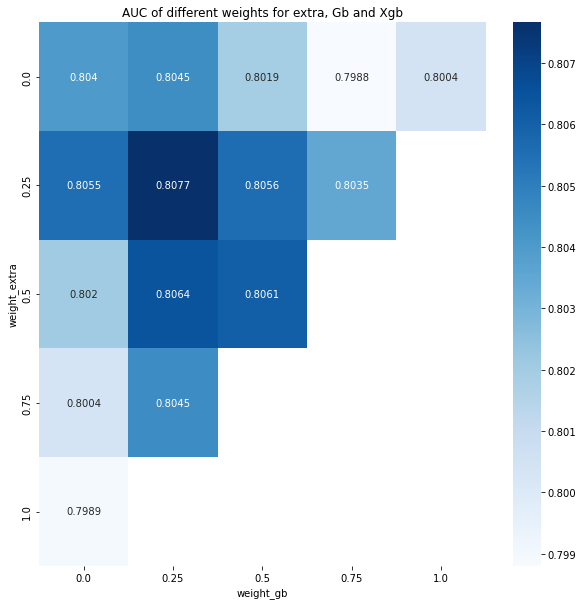

In [8]:
df1 = pd.DataFrame({'weight': [[0.0, 0.0, 1.0], [0.0, 0.25, 0.75], [0.0, 0.5, 0.5], [0.0, 0.75, 0.25], [0.0, 1.0, 0.0], [0.25, 0.0, 0.75], [0.25, 0.25, 0.5], [0.25, 0.5, 0.25], [0.25, 0.75, 0.0], [0.5, 0.0, 0.5], [0.5, 0.25, 0.25], [0.5, 0.5, 0.0], [0.75, 0.0, 0.25], [0.75, 0.25, 0.0], [1.0, 0.0, 0.0]], 'auc': [0.803998, 0.804470, 0.801929, 0.798800, 0.800430, 0.805522, 0.807665, 0.805576, 0.803507, 0.802035, 0.806422, 0.806051, 0.800370, 0.804484, 0.798948]})
df1['weight_extra'] = df1['weight'].apply(lambda x: x[0])
df1['weight_gb'] = df1['weight'].apply(lambda x: x[1])

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df1.pivot('weight_extra', 'weight_gb', 'auc'), annot=True, fmt='.4g', cmap='Blues')
plt.title('AUC of different weights for extra, Gb and Xgb')
plt.show()


In [12]:
Ext_best = ExtraTreesClassifier(
    max_depth=1135,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=1614
)
Ext_res = Ext_best.fit(X_train, y_train)
Gb_best = GradientBoostingClassifier(
    learning_rate=0.05104619739803147,
    max_depth=10,
    min_samples_leaf=18,
    min_samples_split=17,
    n_estimators=103
)
Gb_res = Gb_best.fit(X_train, y_train)
Xgb_best = XGBClassifier(
    learning_rate=0.07856721676232462,
    max_depth=7,
    n_estimators=78,
    scale_pos_weight=0.1
)
Xgb_res = Xgb_best.fit(X_train, y_train)

y_pred_Ext = Ext_res.predict_proba(X_test)[:, 1]
y_pred_Gb = Gb_res.predict_proba(X_test)[:, 1]
y_pred_Xgb = Xgb_res.predict_proba(X_test)[:, 1]

y_pred = 0.25*y_pred_Ext + 0.25*y_pred_Gb + 0.5*y_pred_Xgb
y_pred

array([0.0347935 , 0.08159806, 0.14295187, ..., 0.02263166, 0.07656038,
       0.12426072])

In [17]:
y_test_pred = pd.DataFrame(y_pred, columns=['readmitted_within_30days'])
y_test_pred = pd.concat([test['id'], y_test_pred], axis=1)
y_test_pred.to_csv("3_esemble.csv", index=False)

In [19]:
def esemble_tree_cv_2(weight, X_train = X_train, y_train = y_train):
    auc_scores = []
    for cv in range(5):
        X_test_cv = X_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5), :]
        y_test_cv = y_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)]
        X_train_cv = X_train.drop(X_train.index[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)])
        y_train_cv = y_train.drop(y_train.index[cv*int(len(y_train)/5):(cv+1)*int(len(y_train)/5)])

        Ext_best = ExtraTreesClassifier(
            max_depth=1135,
            min_samples_leaf=2,
            min_samples_split=2,
            n_estimators=1614
        )
        Ext_res = Ext_best.fit(X_train_cv, y_train_cv)
        Gb_best = GradientBoostingClassifier(
            learning_rate=0.05104619739803147,
            max_depth=10,
            min_samples_leaf=18,
            min_samples_split=17,
            n_estimators=103
        )
        Gb_res = Gb_best.fit(X_train_cv, y_train_cv)
        rf_best = RandomForestClassifier(
            max_depth=25,
            min_samples_leaf=1,
            min_samples_split=20,
            n_estimators=155
        )
        rf_res = rf_best.fit(X_train, y_train)

        y_pred_Ext = Ext_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Gb = Gb_res.predict_proba(X_test_cv)[:, 1]
        y_pred_rf = rf_res.predict_proba(X_test_cv)[:, 1]

        y_pred = weight[0]*y_pred_Ext + weight[1]*y_pred_Gb + weight[2]*y_pred_rf
        auc_scores.append(roc_auc_score(y_test_cv, y_pred))

        print(f'cv {cv} auc: {roc_auc_score(y_test_cv, y_pred)}')
    print(f'finished cv for {weight}')

    return np.mean(auc_scores)


In [21]:
weights = []
for weight_1 in np.linspace(0, 1, 5):
    for weight_2 in np.linspace(0, 1, 5):
        if weight_1 + weight_2 <= 1:
            weight_3 = 1 - weight_1 - weight_2
            weights.append([weight_1, weight_2, weight_3])

auc_scores = []
for weight in weights:
    auc_scores.append({'weight': weight, 'auc': esemble_tree_cv_2(weight)})

cv 0 auc: 0.9786969276553382
cv 1 auc: 0.9860620860620861
cv 2 auc: 0.9766896810486737
cv 3 auc: 0.9767815768251001
cv 4 auc: 0.9850433313278459
finished cv for [0.0, 0.0, 1.0]
cv 0 auc: 0.9636608665261642
cv 1 auc: 0.9742479742479742
cv 2 auc: 0.96459457959779
cv 3 auc: 0.9611029327052318
cv 4 auc: 0.9741688961712259
finished cv for [0.0, 0.25, 0.75]
cv 0 auc: 0.9409849824724908
cv 1 auc: 0.9538029871363204
cv 2 auc: 0.9402550870768036
cv 3 auc: 0.9365058436487923
cv 4 auc: 0.952655563947311
finished cv for [0.0, 0.5, 0.5]
cv 0 auc: 0.9020537898605212
cv 1 auc: 0.9142326808993476
cv 2 auc: 0.90068805339548
cv 3 auc: 0.8954863733534735
cv 4 auc: 0.913661209180865
finished cv for [0.0, 0.75, 0.25]
cv 0 auc: 0.7974751914258178
cv 1 auc: 0.8038714372047706
cv 2 auc: 0.7895914749021691
cv 3 auc: 0.7939899384272713
cv 4 auc: 0.8234616418540943
finished cv for [0.0, 1.0, 0.0]
cv 0 auc: 0.9611164652679963
cv 1 auc: 0.9734561734561735
cv 2 auc: 0.9605399792315679
cv 3 auc: 0.95785660338714
cv 

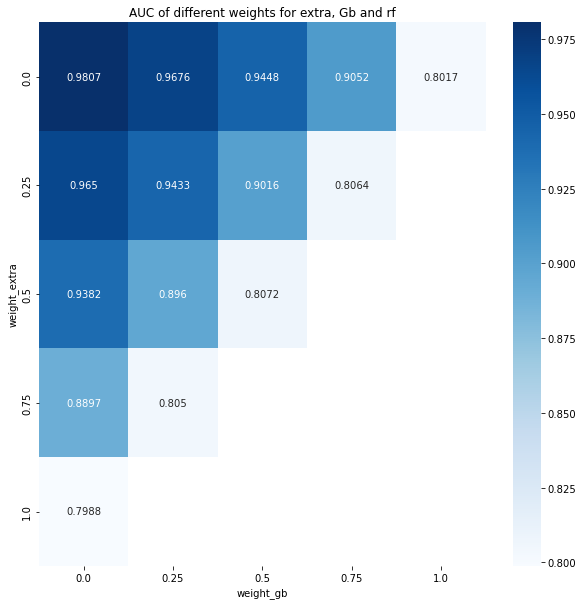

In [17]:
mean_scores = [(0.9786969276553382 + 0.9860620860620861 + 0.9766896810486737 + 0.9767815768251001 + 0.9850433313278459)/5,
                (0.9636608665261642 + 0.9742479742479742 + 0.96459457959779 + 0.9611029327052318 + 0.9741688961712259)/5,
                (0.9409849824724908 + 0.9538029871363204 + 0.9402550870768036 + 0.9365058436487923 + 0.952655563947311)/5,
                (0.9020537898605212 + 0.9142326808993476 + 0.90068805339548 + 0.8954863733534735 + 0.913661209180865)/5,
                (0.7974751914258178 + 0.8038714372047706 + 0.7895914749021691 + 0.7939899384272713 + 0.8234616418540943)/5,
                (0.9611164652679963 + 0.9734561734561735 + 0.9605399792315679 + 0.95785660338714 + 0.9721335398558609)/5,
                (0.9374079938150662 + 0.9536623869957203 + 0.9380659463772826 + 0.9358990770491175 + 0.9512295344282441)/5,
                (0.8954889168952479 + 0.9132965799632466 + 0.8954708436052518 + 0.8909740268052586 + 0.9125641649278665)/5,
                (0.8030604301917965 + 0.8132904132904134 + 0.7955406001706923 + 0.7940155403935023 + 0.8260179981822603)/5,
                (0.9313819196594049 + 0.9483898817232149 + 0.9310678303330084 + 0.9331775880387614 + 0.9468989618402693)/5,
                (0.8892669158997278 + 0.9068388401721734 + 0.8900396079892406 + 0.8856334566494706 + 0.9084192065950665)/5,
                (0.8028300837719623 + 0.812259345592679 + 0.7987708047635277 + 0.7971300195855042 + 0.8249990399262663)/5,
                (0.8822095781748092 + 0.9029341029341029 + 0.884142007456554 + 0.8790627120162828 + 0.9000537641290852)/5,
                (0.7976088982557216 + 0.8144300144300146 + 0.797705960222904 + 0.7952239531996057 + 0.8201218653592595)/5,
                (0.7920276309797402 + 0.8063886730553398 + 0.7936513598566819 + 0.7909804272968164 + 0.8111202140324375)/5]
weights = [[0.0, 0.0, 1.0], [0.0, 0.25, 0.75], [0.0, 0.5, 0.5], [0.0, 0.75, 0.25], [0.0, 1.0, 0.0], [0.25, 0.0, 0.75], [0.25, 0.25, 0.5], [0.25, 0.5, 0.25], [0.25, 0.75, 0.0], [0.5, 0.0, 0.5], [0.5, 0.25, 0.25], [0.5, 0.5, 0.0], [0.75, 0.0, 0.25], [0.75, 0.25, 0.0], [1.0, 0.0, 0.0]]
df2 = pd.DataFrame({'weight': weights, 'auc': mean_scores})
df2['weight_extra'] = df2['weight'].apply(lambda x: x[0])
df2['weight_gb'] = df2['weight'].apply(lambda x: x[1])

plt.figure(figsize=(10, 10))
sns.heatmap(df2.pivot('weight_extra', 'weight_gb', 'auc'), annot=True, fmt='.4g', cmap='Blues')
plt.title('AUC of different weights for extra, Gb and rf')
plt.show()

                

In [22]:
max_auc = 0
max_weight = []
for auc_score in auc_scores:
    if auc_score['auc'] > max_auc:
        max_auc = auc_score['auc']
        max_weight = auc_score['weight']
print(f'Best weight: {max_weight}')

Best weight: [0.0, 0.0, 1.0]


In [27]:
def ensemble_tree_cv_3(weight, X_train = X_train, y_train = y_train):
    auc_scores = []
    for cv in range(5):
        X_test_cv = X_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5), :]
        y_test_cv = y_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)]
        X_train_cv = X_train.drop(X_train.index[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)])
        y_train_cv = y_train.drop(y_train.index[cv*int(len(y_train)/5):(cv+1)*int(len(y_train)/5)])

        Ext_best = ExtraTreesClassifier(
            max_depth=1135,
            min_samples_leaf=2,
            min_samples_split=2,
            n_estimators=1614
        )
        Ext_res = Ext_best.fit(X_train_cv, y_train_cv)
        rf_best = RandomForestClassifier(
            max_depth=25,
            min_samples_leaf=1,
            min_samples_split=20,
            n_estimators=155
        )
        rf_res = rf_best.fit(X_train, y_train)
        Xgb_best = XGBClassifier(
            learning_rate=0.07856721676232462,
            max_depth=7,
            n_estimators=78,
            scale_pos_weight=0.1
        )
        Xgb_res = Xgb_best.fit(X_train_cv, y_train_cv)

        y_pred_Ext = Ext_res.predict_proba(X_test_cv)[:, 1]
        y_pred_rf = rf_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Xgb = Xgb_res.predict_proba(X_test_cv)[:, 1]

        y_pred = weight[0]*y_pred_Ext + weight[1]*y_pred_rf + weight[2]*y_pred_Xgb
        auc_scores.append(roc_auc_score(y_test_cv, y_pred))

        print(f'cv {cv} auc: {roc_auc_score(y_test_cv, y_pred)}')
    print(f'finished cv for {weight}')

    return np.mean(auc_scores)

In [29]:
auc_scores3 = []
for weight in weights:
    auc_scores3.append({'weight': weight, 'auc': ensemble_tree_cv_3(weight)})

cv 0 auc: 0.7977095093356491
cv 1 auc: 0.8127674794341461
cv 2 auc: 0.7998303647158609
cv 3 auc: 0.7908882602183849
cv 4 auc: 0.8187931233118704
finished cv for [0.0, 0.0, 1.0]
cv 0 auc: 0.9500717515859483
cv 1 auc: 0.9631565964899298
cv 2 auc: 0.9497369596178185
cv 3 auc: 0.9475466915859139
cv 4 auc: 0.9630282005658035
finished cv for [0.0, 0.25, 0.75]
cv 0 auc: 0.9661271618143883
cv 1 auc: 0.9760116426783093
cv 2 auc: 0.9649182606306099
cv 3 auc: 0.9651006797322035
cv 4 auc: 0.9772462525121929
finished cv for [0.0, 0.5, 0.5]
cv 0 auc: 0.9748935640680766
cv 1 auc: 0.9806748806748807
cv 2 auc: 0.9724144491213051
cv 3 auc: 0.9709865717687117
cv 4 auc: 0.9818085228945582
finished cv for [0.0, 0.75, 0.25]
cv 0 auc: 0.9778748292259302
cv 1 auc: 0.9865406198739533
cv 2 auc: 0.9770212889639301
cv 3 auc: 0.9754297930081031
cv 4 auc: 0.9856539382224555
finished cv for [0.0, 1.0, 0.0]
cv 0 auc: 0.7973110365059362
cv 1 auc: 0.8149763816430483
cv 2 auc: 0.7980151086379239
cv 3 auc: 0.792839130045

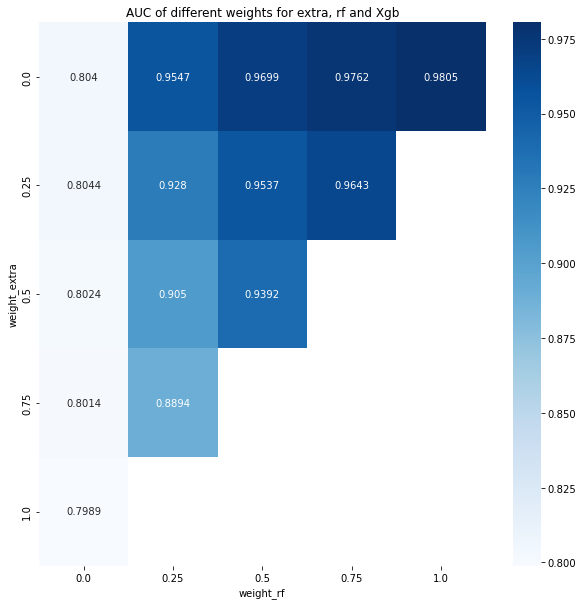

In [18]:
mean_scores3 = [(0.7977095093356491 + 0.8127674794341461 + 0.7998303647158609 + 0.7908882602183849 + 0.8187931233118704)/5,
                (0.9500717515859483 + 0.9631565964899298 + 0.9497369596178185 + 0.9475466915859139 + 0.9630282005658035)/5,
                (0.9661271618143883 + 0.9760116426783093 + 0.9649182606306099 + 0.9651006797322035 + 0.9772462525121929)/5,
                (0.9748935640680766 + 0.9806748806748807 + 0.9724144491213051 + 0.9709865717687117 + 0.9818085228945582)/5,
                (0.9778748292259302 + 0.9865406198739533 + 0.9770212889639301 + 0.9754297930081031 + 0.9856539382224555)/5,
                (0.7973110365059362 + 0.8149763816430483 + 0.7980151086379239 + 0.7928391300451875 + 0.8190696245471653)/5,
                (0.9210732554568273 + 0.9392397725731059 + 0.9226759041269992 + 0.9200860226065363 + 0.9368156274401873)/5,
                (0.9482686951272465 + 0.9608921942255275 + 0.9492758792894344 + 0.9467773525006721 + 0.9630973258746273)/5,
                (0.9604307213284898 + 0.9711831378498044 + 0.9581037840294456 + 0.9606036943637273 + 0.971412844506458)/5,
                (0.7960547218368406 + 0.8121865788532456 + 0.7959356231454399 + 0.7928724126012878 + 0.814754413138929)/5,
                (0.8982080637132901 + 0.9183668183668183 + 0.8992070475269448 + 0.8951330662194856 + 0.9143038185332633)/5,
                (0.9321497410588521 + 0.9499031832365167 + 0.9327536139978174 + 0.9323826469872886 + 0.9488459913721373)/5,
                (0.7956337438971437 + 0.8091747758414425 + 0.7963557479145694 + 0.7919046582777558 + 0.8140721207388728)/5,
                (0.8814867669953296 + 0.9030327696994364 + 0.8840217830729353 + 0.8791715203727648 + 0.8991551351143767)/5,
                (0.7927835379091958 + 0.808426141759475 + 0.7929987132027512 + 0.7894033461769865 + 0.8107144228676763)/5]
weights = [[0.0, 0.0, 1.0], [0.0, 0.25, 0.75], [0.0, 0.5, 0.5], [0.0, 0.75, 0.25], [0.0, 1.0, 0.0], [0.25, 0.0, 0.75], [0.25, 0.25, 0.5], [0.25, 0.5, 0.25], [0.25, 0.75, 0.0], [0.5, 0.0, 0.5], [0.5, 0.25, 0.25], [0.5, 0.5, 0.0], [0.75, 0.0, 0.25], [0.75, 0.25, 0.0], [1.0, 0.0, 0.0]]
df3 = pd.DataFrame({'weight': weights, 'auc': mean_scores3})
df3['weight_extra'] = df3['weight'].apply(lambda x: x[0])
df3['weight_rf'] = df3['weight'].apply(lambda x: x[1])

plt.figure(figsize=(10, 10))
sns.heatmap(df3.pivot('weight_extra', 'weight_rf', 'auc'), annot=True, fmt='.4g', cmap='Blues')
plt.title('AUC of different weights for extra, rf and Xgb')
plt.show()

In [32]:
def ensemble_tree_cv_4(weight, X_train = X_train, y_train = y_train):
    auc_scores = []
    for cv in range(5):
        X_test_cv = X_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5), :]
        y_test_cv = y_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)]
        X_train_cv = X_train.drop(X_train.index[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)])
        y_train_cv = y_train.drop(y_train.index[cv*int(len(y_train)/5):(cv+1)*int(len(y_train)/5)])

        rf_best = RandomForestClassifier(
            max_depth=25,
            min_samples_leaf=1,
            min_samples_split=20,
            n_estimators=155
        )
        rf_res = rf_best.fit(X_train_cv, y_train_cv)
        Gb_best = GradientBoostingClassifier(
            learning_rate=0.05104619739803147,
            max_depth=10,
            min_samples_leaf=18,
            min_samples_split=17,
            n_estimators=103
        )
        Gb_res = Gb_best.fit(X_train_cv, y_train_cv)
        Xgb_best = XGBClassifier(
            learning_rate=0.07856721676232462,
            max_depth=7,
            n_estimators=78,
            scale_pos_weight=0.1
        )
        Xgb_res = Xgb_best.fit(X_train_cv, y_train_cv)

        y_pred_rf = rf_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Gb = Gb_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Xgb = Xgb_res.predict_proba(X_test_cv)[:, 1]

        y_pred = weight[0]*y_pred_rf + weight[1]*y_pred_Gb + weight[2]*y_pred_Xgb
        auc_scores.append(roc_auc_score(y_test_cv, y_pred))

        print(f'cv {cv} auc: {roc_auc_score(y_test_cv, y_pred)}')
    print(f'finished cv for {weight}')

    return np.mean(auc_scores)


In [33]:
auc_scores4 = []
for weight in weights:
    auc_scores4.append({'weight': weight, 'auc': ensemble_tree_cv_4(weight)})

cv 0 auc: 0.7977095093356491
cv 1 auc: 0.8127674794341461
cv 2 auc: 0.7998303647158609
cv 3 auc: 0.7908882602183849
cv 4 auc: 0.8187931233118704
finished cv for [0.0, 0.0, 1.0]
cv 0 auc: 0.8031663365917201
cv 1 auc: 0.8092524759191426
cv 2 auc: 0.7985356405845812
cv 3 auc: 0.7943214838899628
cv 4 auc: 0.8259949564126524
finished cv for [0.0, 0.25, 0.75]
cv 0 auc: 0.8050673564703515
cv 1 auc: 0.8058225724892392
cv 2 auc: 0.7941164036262844
cv 3 auc: 0.7907896926483953
cv 4 auc: 0.8251360104456023
finished cv for [0.0, 0.5, 0.5]
cv 0 auc: 0.8006113446935599
cv 1 auc: 0.7985458985458985
cv 2 auc: 0.7916035818939436
cv 3 auc: 0.789911545206672
cv 4 auc: 0.8244575583404806
finished cv for [0.0, 0.75, 0.25]
cv 0 auc: 0.7977386335956282
cv 1 auc: 0.7934226267559601
cv 2 auc: 0.7907487997378844
cv 3 auc: 0.7898526606843406
cv 4 auc: 0.8224682855643313
finished cv for [0.0, 1.0, 0.0]
cv 0 auc: 0.7910427014604493
cv 1 auc: 0.8099234099234099
cv 2 auc: 0.7997537381856423
cv 3 auc: 0.7842791126358

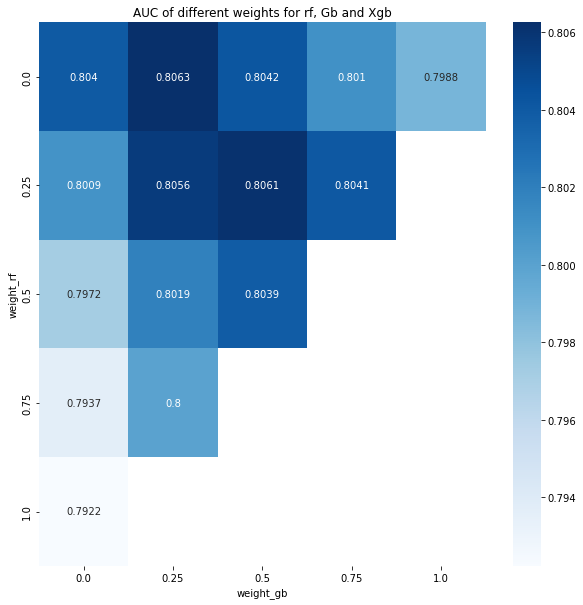

In [19]:
mean_scores4 = [(0.7977095093356491 + 0.8127674794341461 + 0.7998303647158609 + 0.7908882602183849 + 0.8187931233118704)/5,
                (0.8031663365917201 + 0.8092524759191426 + 0.7985356405845812 + 0.7943214838899628 + 0.8259949564126524)/5,
                (0.8050673564703515 + 0.8058225724892392 + 0.7941164036262844 + 0.7907896926483953 + 0.8251360104456023)/5,
                (0.8006113446935599 + 0.7985458985458985 + 0.7916035818939436 + 0.789911545206672 + 0.8244575583404806)/5,
                (0.7977386335956282 + 0.7934226267559601 + 0.7907487997378844 + 0.7898526606843406 + 0.8224682855643313)/5,
                (0.7910427014604493 + 0.8099234099234099 + 0.7997537381856423 + 0.7842791126358504 + 0.819431892369334)/5,
                (0.7996409773042584 + 0.809733476400143 + 0.802660261745658 + 0.7911878032232874 + 0.8249747180583469)/5,
                (0.8037210213613208 + 0.8073482073482073 + 0.8007155332545929 + 0.791451503475467 + 0.8273621014093884)/5,
                (0.8044226512608157 + 0.8036173702840369 + 0.7998898163341339 + 0.7883011815307415 + 0.8241272929761005)/5,
                (0.7890225368819038 + 0.8048001381334713 + 0.8002531317791358 + 0.7825548202101922 + 0.8093882410169101)/5,
                (0.7953067578873791 + 0.8053119719786386 + 0.8015874903225977 + 0.7860430881091667 + 0.8212163494156351)/5,
                (0.7977955582855873 + 0.8090181423514756 + 0.8011198042588498 + 0.7877712208297598 + 0.82358197109538)/5,
                (0.7867230441735594 + 0.8021373688040354 + 0.7968036167722262 + 0.7752108961968278 + 0.8074514522715344)/5,
                (0.797448714825837 + 0.8055302721969388 + 0.7987734470576733 + 0.7822219946491891 + 0.8159500249619172)/5,
                (0.7852509452146192 + 0.7984965651632319 + 0.7929366192903325 + 0.7768519822322355 + 0.8076204252486592)/5]
weights = [[0.0, 0.0, 1.0], [0.0, 0.25, 0.75], [0.0, 0.5, 0.5], [0.0, 0.75, 0.25], [0.0, 1.0, 0.0], [0.25, 0.0, 0.75], [0.25, 0.25, 0.5], [0.25, 0.5, 0.25], [0.25, 0.75, 0.0], [0.5, 0.0, 0.5], [0.5, 0.25, 0.25], [0.5, 0.5, 0.0], [0.75, 0.0, 0.25], [0.75, 0.25, 0.0], [1.0, 0.0, 0.0]]
df4 = pd.DataFrame({'weight': weights, 'auc': mean_scores4})
df4['weight_rf'] = df4['weight'].apply(lambda x: x[0])
df4['weight_gb'] = df4['weight'].apply(lambda x: x[1])

plt.figure(figsize=(10, 10))
sns.heatmap(df4.pivot('weight_rf', 'weight_gb', 'auc'), annot=True, fmt='.4g', cmap='Blues')
plt.title('AUC of different weights for rf, Gb and Xgb')
plt.show()


In [21]:
# locate the max auc
max_auc = 0
max_weight = []
for row in df4.iterrows():
    if row[1]['auc'] > max_auc:
        max_auc = row[1]['auc']
        max_weight = row[1]['weight']
print(f'Best weight: {max_weight}')

Best weight: [0.0, 0.25, 0.75]


In [23]:
Gb_best = GradientBoostingClassifier(
    learning_rate=0.05104619739803147,
    max_depth=10,
    min_samples_leaf=18,
    min_samples_split=17,
    n_estimators=103
)
Gb_res = Gb_best.fit(X_train, y_train)
Xgb_best = XGBClassifier(
    learning_rate=0.07856721676232462,
    max_depth=7,
    n_estimators=78,
    scale_pos_weight=0.1
)
Xgb_res = Xgb_best.fit(X_train, y_train)

y_pred_Gb = Gb_res.predict_proba(X_test)[:, 1]
y_pred_Xgb = Xgb_res.predict_proba(X_test)[:, 1]

y_pred = 0.25*y_pred_Gb + 0.75*y_pred_Xgb

y_test_pred = pd.DataFrame(y_pred, columns=['readmitted_within_30days'])
y_test_pred = pd.concat([test['id'], y_test_pred], axis=1)
y_test_pred.to_csv("rf_gb_xgb_ensemble.csv", index=False)